In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

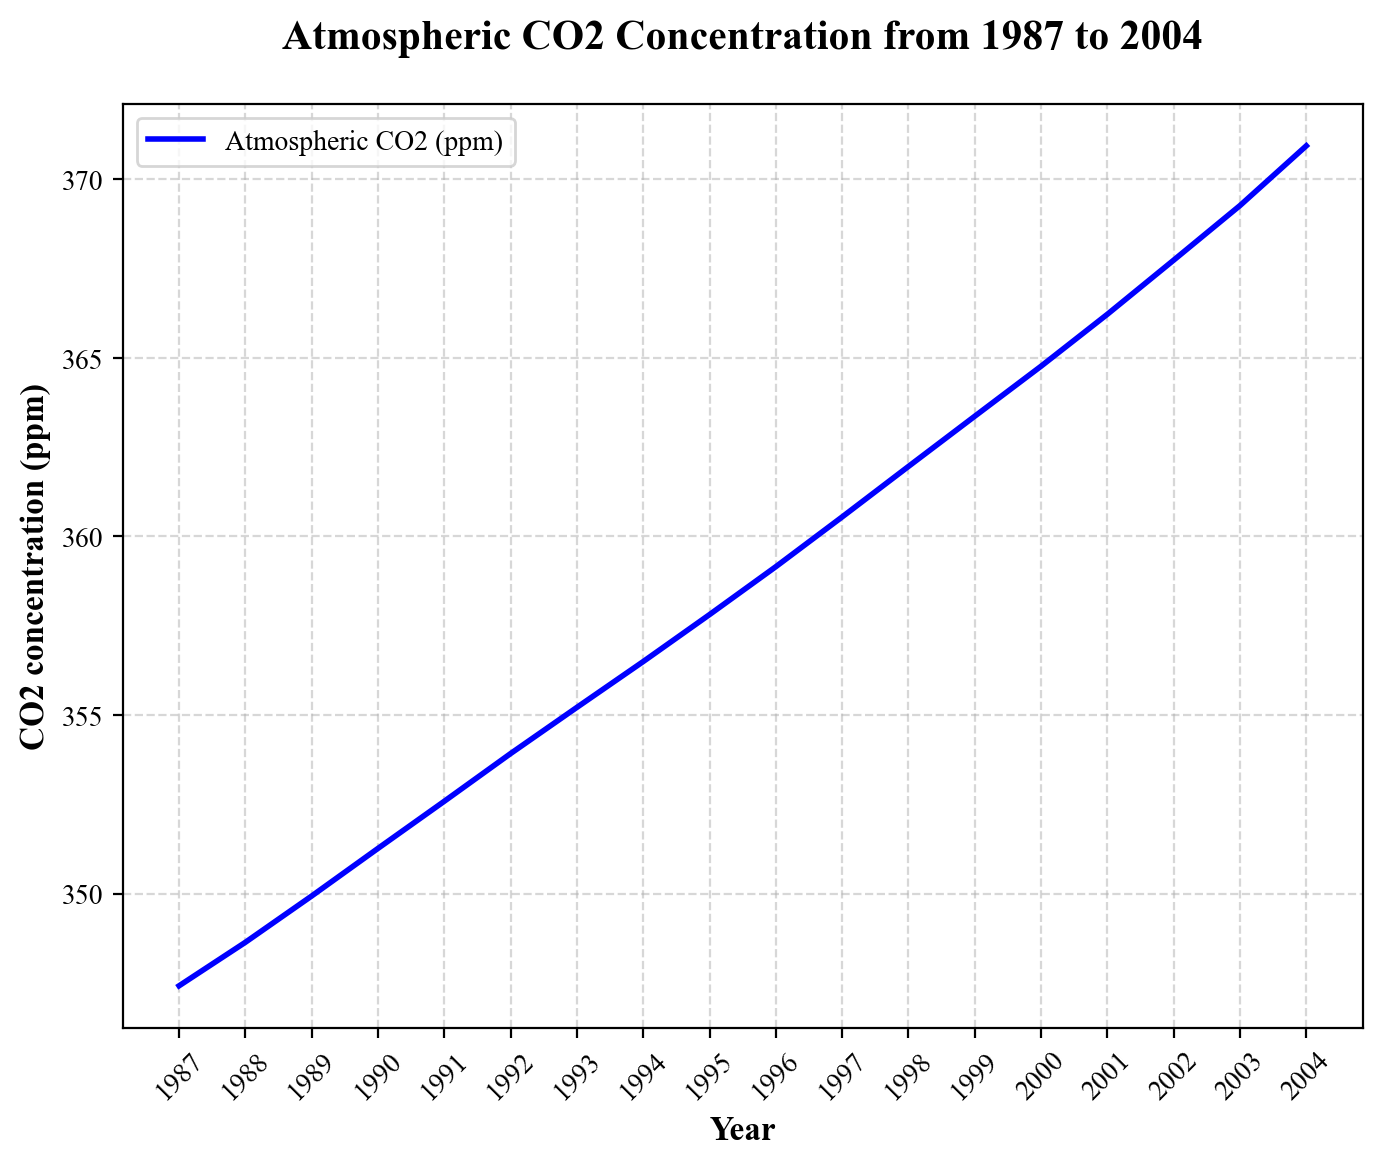

In [9]:
#1.1
#载入表格数据，并且根据表格里的具体解释选择相应列和年份
co2_emissions = pd.read_excel('Global_Carbon_Budget_2016_v1.0.xlsx', sheet_name='Fossil Emissions by Fuel Type') 
co2_emissions.columns = co2_emissions.iloc[9] #将第9行作为列名，挺奇怪的这表格
co2_emissions = co2_emissions.iloc[10:] #从第10行开始取数据
co2_emissions = co2_emissions[['Year','Total','Cement']] 
co2_emissions = co2_emissions[(co2_emissions['Year'] >= 1987) & (co2_emissions['Year'] <= 2004)] #取1987-2004年的数据
co2_emissions['Fossil fuel emissions'] = (co2_emissions['Total'] - co2_emissions['Cement']) / 1000 / 2.12 #计算化石燃料排放量,并转化为ppm
yearly_emissions = dict(zip(co2_emissions['Year'], co2_emissions['Fossil fuel emissions'])) #将年份和排放量转化为字典

# 模型1.1和1.2的系数
k12 = 105/740  # 根据文章要求转化
k21 = 102/900  # 根据文章要求转化

# 1986年的atmosphere和surface ocean的初始值（in PgC），并转化为ppm
N1_0 = 740 / 2.13 # atmosphere
N2_0 = 900 / 2.13 # surface ocean

# 根据equation1,2得到的微分方程
def model1_1(N, t, k12, k21, yearly_emissions):
    N1, N2 = N
    year = int(t)
    gamma = yearly_emissions.get(year, 0)  # 若值不存在则返回0
    dN1dt = -k12 * N1 + k21 * N2 + gamma
    dN2dt = k12 * N1 - k21 * N2
    return [dN1dt, dN2dt]

# 带入初值和参数，解微分方程
years = np.arange(1987, 2005)
N0 = [N1_0, N2_0]
solution1_1 = odeint(model1_1, N0, years, args=(k12, k21, yearly_emissions))

# 提取结果
N1_ppm = solution1_1[:, 0]

# 画图
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(years, N1_ppm, label="Atmospheric CO2 (ppm)", linewidth=2, color='blue')
plt.xticks(np.arange(1987, 2005, 1), rotation=45,fontname='Times New Roman')
plt.yticks(fontname='Times New Roman')
plt.xlabel("Year", weight='bold', fontsize=12,fontname='Times New Roman')
plt.ylabel("CO2 concentration (ppm)", weight='bold', fontsize=12,fontname='Times New Roman')
plt.title("Atmospheric CO2 Concentration from 1987 to 2004", weight='bold', fontsize=15, fontname='Times New Roman',pad=20)
plt.legend(prop={'size': 10, 'family': 'Times New Roman'})
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


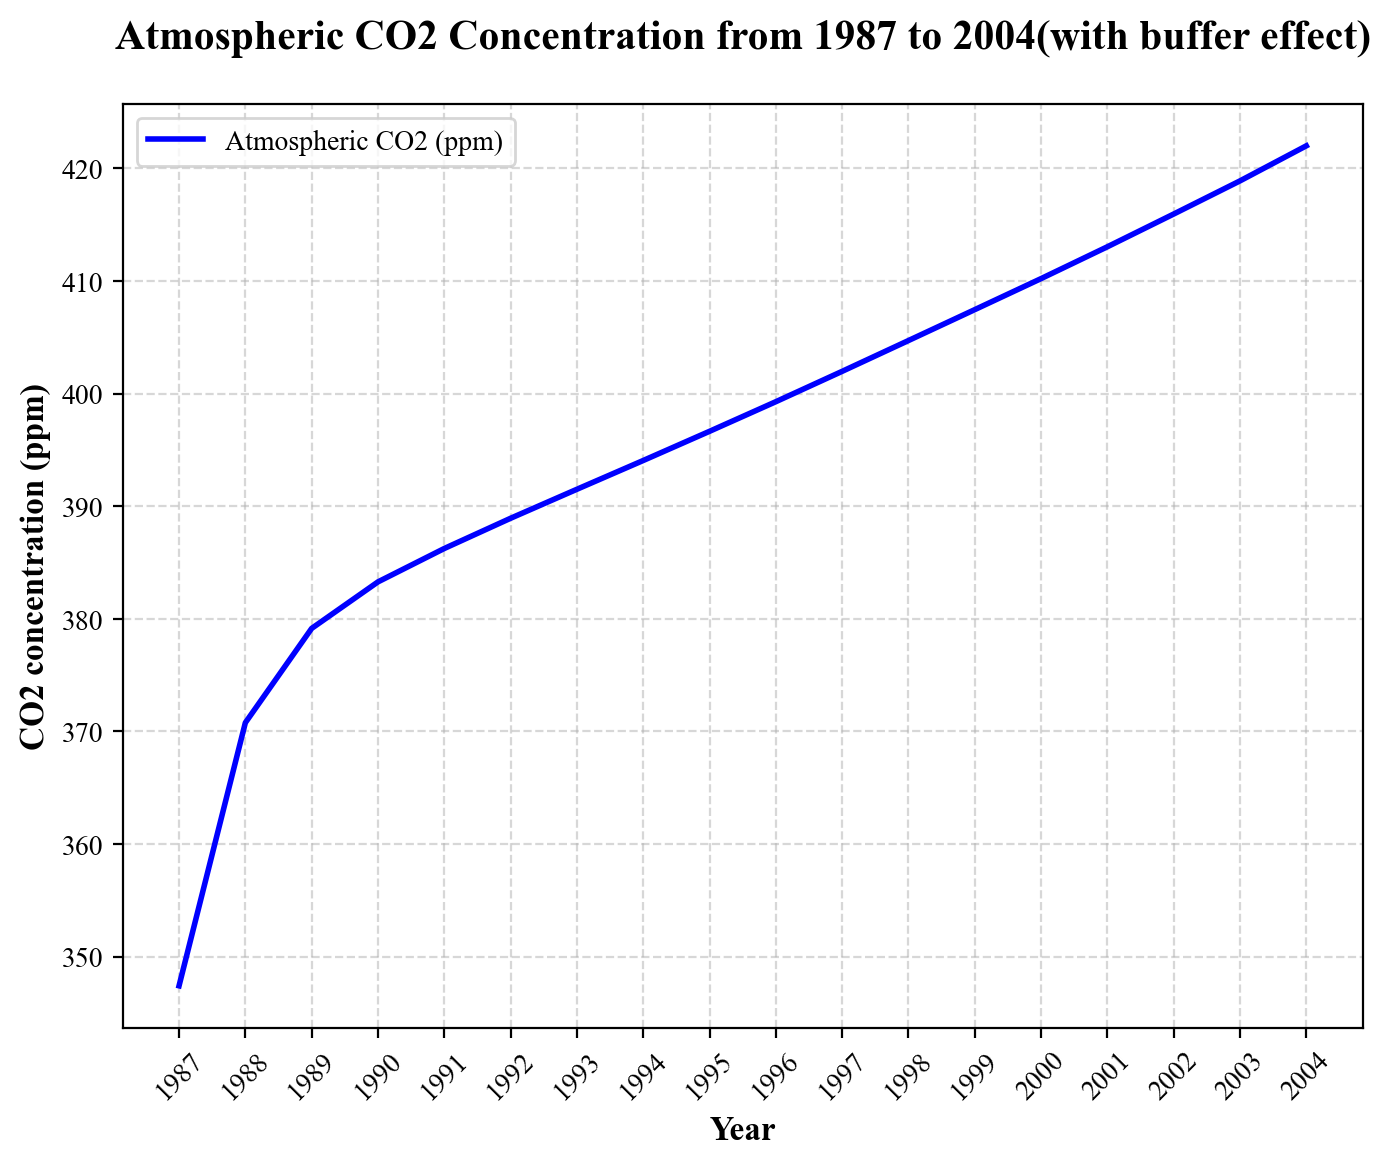

In [10]:
#1.2
# 模型1.2参数
k12 = 105/740  # 与1.1相同
k21 = 102/900  # 

# 1986年的atmosphere和surface ocean的初始值（in PgC），并转化为ppm
N1_0 = 740 / 2.13 # atmosphere
N2_0 = 900 / 2.13 # surface ocean

def model1_2(N, t, k12, k21, yearly_emissions):
    N1, N2 = N
    year = int(t)
    gamma = yearly_emissions.get(year, 0)  # 若值不存在则返回0
    dN1dt = -k12 * N1 + k21 * (821/2.13 + (3.69 + 1.86e-2 * N1 - 1.80e-6 * N1**2) * (N2-821/2.13)) + gamma  #根据论文中的公式计算了ξ
    dN2dt = k12 * N1 - k21 * (821/2.13 + (3.69 + 1.86e-2 * N1 - 1.80e-6 * N1**2) * (N2-821/2.13))
    return [dN1dt, dN2dt]

# 带入初值和参数，解微分方程
years = np.arange(1987, 2005)
N0 = [N1_0, N2_0]
solution1_2 = odeint(model1_2, N0, years, args=(k12, k21, yearly_emissions))

# 提取结果
N1_ppm_1_2 = solution1_2[:, 0]

# 画图
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(years, N1_ppm_1_2, label="Atmospheric CO2 (ppm)", linewidth=2, color='blue')
plt.xticks(np.arange(1987, 2005, 1), rotation=45,fontname='Times New Roman')
plt.yticks(fontname='Times New Roman')
plt.xlabel("Year", weight='bold', fontsize=12,fontname='Times New Roman')
plt.ylabel("CO2 concentration (ppm)", weight='bold', fontsize=12,fontname='Times New Roman')
plt.title("Atmospheric CO2 Concentration from 1987 to 2004(with buffer effect)", weight='bold', fontsize=15, fontname='Times New Roman',pad=20)
plt.legend(prop={'size': 10, 'family': 'Times New Roman'})
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

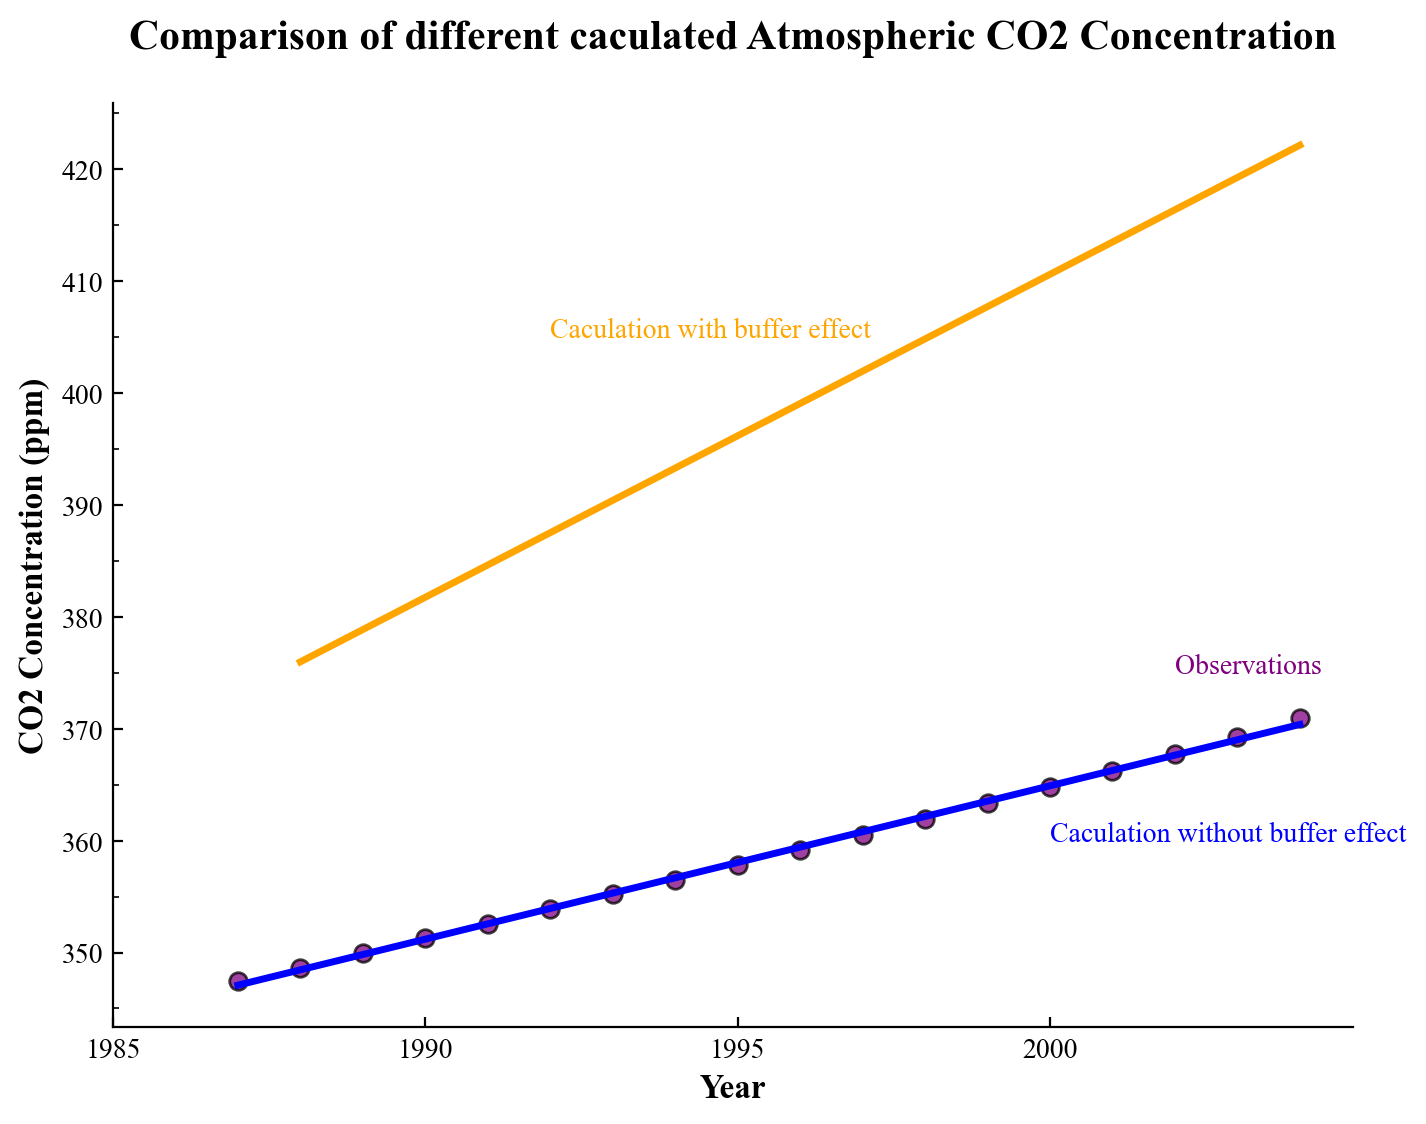

In [11]:
#1.3
import matplotlib.ticker as ticker

# 线性拟合散点系数
linear_regression_without_buffer = np.polyfit(years, N1_ppm, 1) #1次多项式拟合，返回系数
linear_regression_with_buffer = np.polyfit(years[1:], N1_ppm_1_2[1:], 1) #1次多项式拟合，返回系数

# 画出拟合的直线
linear_regression_line_without_buffer = np.polyval(linear_regression_without_buffer, years) #根据系数，计算拟合的直线
linear_regression_line_with_buffer = np.polyval(linear_regression_with_buffer, years[1:]) 

# 画图
plt.figure(figsize=(8, 6), dpi=200)
plt.scatter(years, N1_ppm, s=40, marker='o', edgecolors='black', linewidths=1,alpha=0.75, color='purple')
plt.plot(years, linear_regression_line_without_buffer, linewidth=2.5, color='blue')
plt.plot(years[1:], linear_regression_line_with_buffer, linewidth=2.5, color='orange')
plt.xticks(np.arange(1985, 2005, 5),fontname='Times New Roman')
plt.yticks(fontname='Times New Roman')
plt.tick_params(axis='both', direction='in') 
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(5))# 设置y轴次要刻度间隔为5
plt.tick_params(axis='y', which='minor', direction='in') #设置刻度线朝里
plt.xlabel("Year", weight='bold', fontsize=12,fontname='Times New Roman')
plt.ylabel("CO2 Concentration (ppm)", weight='bold', fontsize=12,fontname='Times New Roman')
plt.title("Comparison of different caculated Atmospheric CO2 Concentration", weight='bold', fontsize=15,fontname='Times New Roman',pad=20)
plt.annotate('Caculation with buffer effect',xy=(1992, 405), xytext=(1992, 405),fontname='Times New Roman', color='orange')
plt.annotate('Caculation without buffer effect',xy=(2000, 360), xytext=(2000, 360),fontname='Times New Roman', color='blue')
plt.annotate('Observations',xy=(2002, 375), xytext=(2002, 375),fontname='Times New Roman', color='purple')
plt.gca().spines['top'].set_visible(False) #去掉上边框
plt.gca().spines['right'].set_visible(False) #去掉右边框
plt.show()



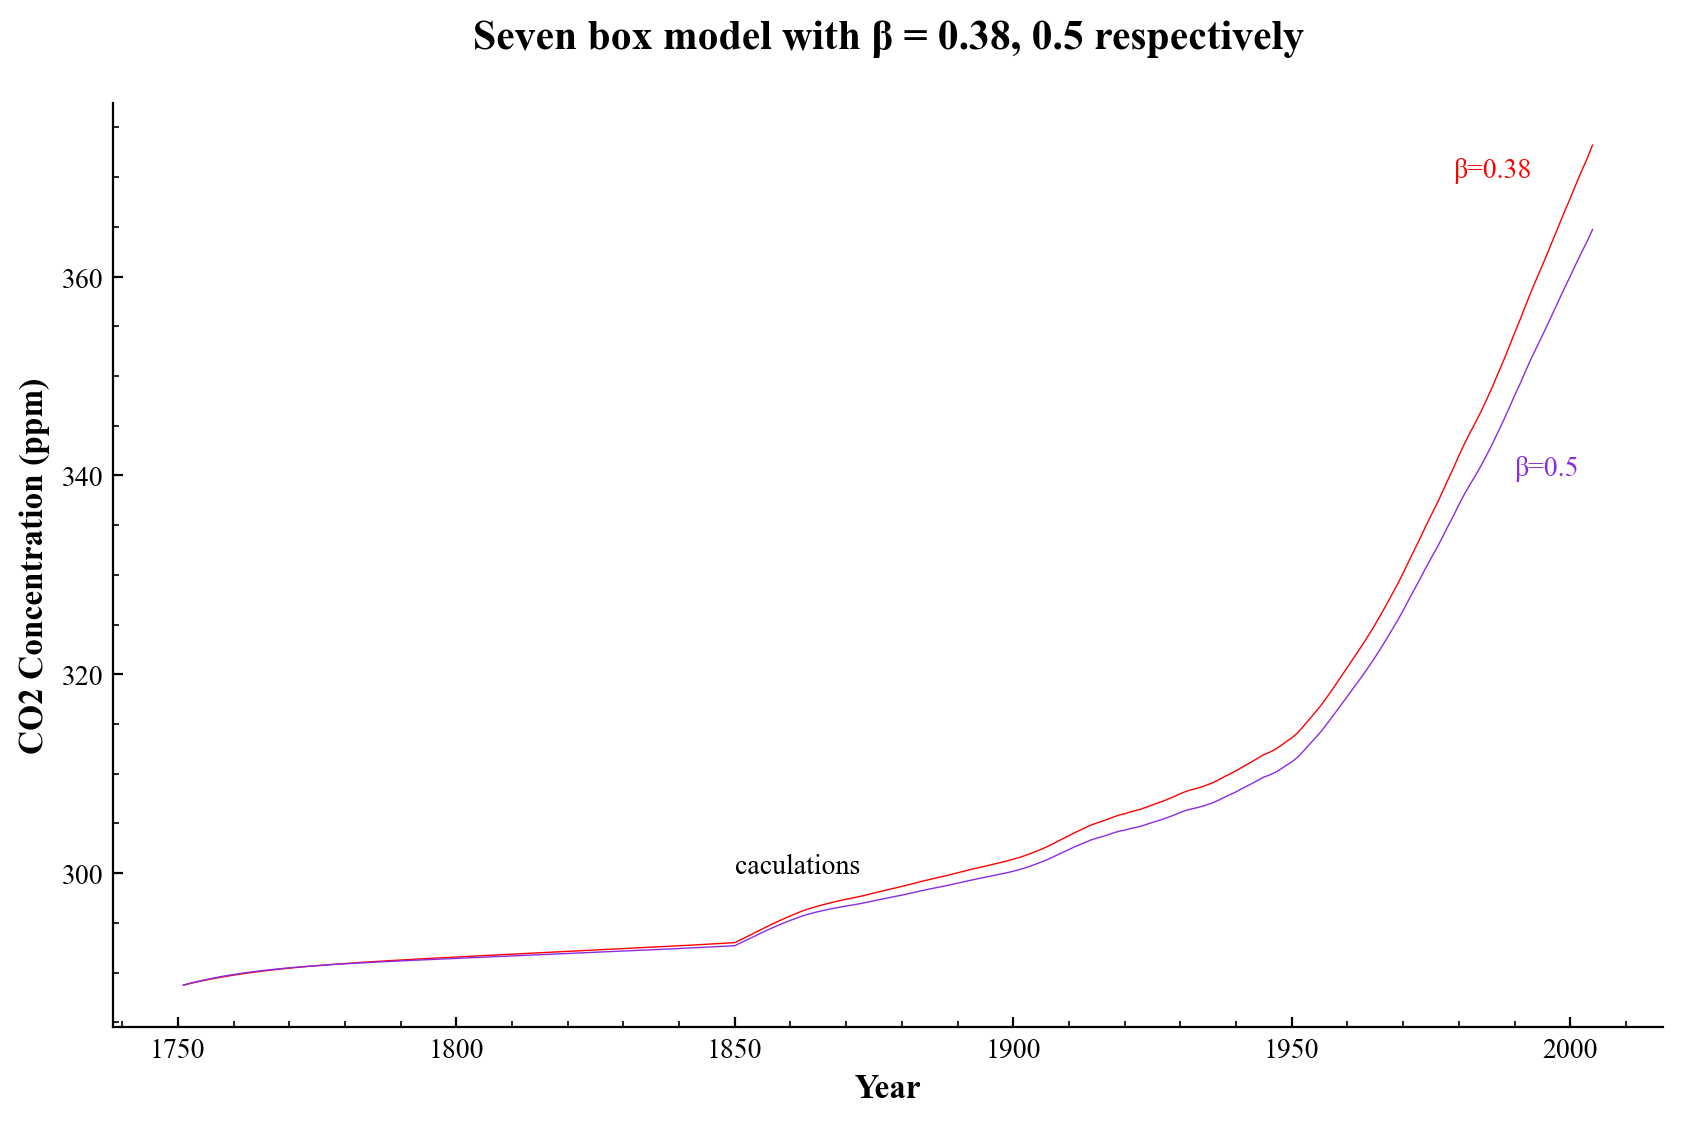

In [12]:
#Bonus

# 载入fossil fuel表格数据，并且根据表格里的具体解释选择相应列和年份
co2_emissions2 = pd.read_csv('global.1751_2014.csv')
co2_emissions2 = co2_emissions2.iloc[1:]  # 从3行开始才是数据
co2_emissions2 = co2_emissions2[['Year','Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)','Carbon emissions from cement production',]] #根据文中对γ的描述，选择fossil fuel一列
co2_emissions2['Year']=co2_emissions2['Year'].apply(lambda x: int(x)) #由于表格内数据都是str格式，这里统一修改为int
co2_emissions2['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)']=co2_emissions2['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].apply(lambda x: int(x))
co2_emissions2['Carbon emissions from cement production']=co2_emissions2['Carbon emissions from cement production'].apply(lambda x: int(x))
co2_emissions2 = co2_emissions2[(co2_emissions2['Year'] > 1750) & (co2_emissions2['Year'] < 2005)]
co2_emissions2['fossil_fuel_emissions'] = (co2_emissions2['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] - co2_emissions2['Carbon emissions from cement production'])/(2.13*1000)
yearly_emissions2 = dict(zip(co2_emissions2['Year'], co2_emissions2['fossil_fuel_emissions'])) #创建年排放字典，通过zip添加映射

# 载入land use表格数据，并且根据表格里的具体解释选择相应列和年份
landusechange_emissions = pd.read_excel('Global_Carbon_Budget_2016_v1.0.xlsx', sheet_name='Historical Budget')
landusechange_emissions.columns = landusechange_emissions.iloc[13] #将第13行作为列名，挺奇怪的这表格
landusechange_emissions = landusechange_emissions.iloc[14:] # Skipping rows before the data starts
landusechange_emissions = landusechange_emissions[['Year', 'land-use change emissions']]
landusechange_emissions = landusechange_emissions[(landusechange_emissions['Year'] >1750) & (landusechange_emissions['Year'] < 2005)]
landusechange_emissions['land-use change emissions'] = landusechange_emissions['land-use change emissions']/2.13
land_use_change = dict(zip(landusechange_emissions['Year'], landusechange_emissions['land-use change emissions']))
landusechange_emissions.columns = landusechange_emissions.iloc[13]

# 定义初始值并把单位转化为ppm
N1_0= 615/2.13  
N2_0 = 842/2.13 
N3_0 = 9744/2.13 
N4_0 = 26280/2.13 
N5_0 = 90000000/2.13
N6_0 = 731/2.13
N7_0 = 1328/2.13

# 定义模型系数
k12 = 60/615
k21 = 60/842 
k23 = 9/842
k24 = 43/842
k32 = 52/9744
k34 = 162/9744
k43 = 205/26280
k45 = 0.2/26280
k51 = 0.2/90000000
k67 = 62/731
k71 = 62/1328

# 定义微分方程
def model1_3(N, t, k12, k21, k23, k24, k32, k34, k43, k45, k51, k67, k71, β, yearly_emissions, land_use_change):
    N1, N2, N3, N4, N5, N6, N7= N
    year = int(t)
    N20 = 842/2.13
    f0 = 62/2.13
    P0 = 290.21
    f = f0 * (1 + β * np.log(N1/P0))
    gamma = yearly_emissions.get(year, 0)
    delta = land_use_change.get(year, 0)
    dN1dt = -k12 * N1 + k21 * (N20 +(3.69 + 1.86e-2 * N1 - 1.80e-6 * N1**2) * (N2 - N20)) + gamma - f + delta + k51 * N5 + k71 * N7 
    dN2dt = k12 * N1 - k21 * (N20 +(3.69 + 1.86e-2 * N1 - 1.80e-6 * N1**2) * (N2 - N20)) - k23 * N2 + k32 * N3 - k24 * N2
    dN3dt = k23 * N2 - k32 * N3 - k34 * N3 + k43 * N4
    dN4dt = k34 * N3 - k43 * N4 + k24 * N2 - k45 * N4
    dN5dt = k45 * N4 - k51 * N5
    dN6dt = f - k67 * N6 - 2 * delta
    dN7dt = k67 * N6 - k71 * N7 + delta
    return [dN1dt, dN2dt, dN3dt, dN4dt, dN5dt, dN6dt, dN7dt]

# 带入初值和参数，解微分方程
years2 = np.arange(1751, 2005)
N02 = [N1_0, N2_0, N3_0, N4_0, N5_0, N6_0, N7_0]
β= 0.38
β1 = 0.5
solution1_3 = odeint(model1_3, N02, years2, args=(k12, k21, k23, k24, k32, k34, k43, k45, k51, k67, k71, β, yearly_emissions2, land_use_change))
solution1_3_1 = odeint(model1_3, N02, years2, args=(k12, k21, k23, k24, k32, k34, k43, k45, k51, k67, k71, β1, yearly_emissions2, land_use_change))

# 提取结果
N1_PPM_1_3 = solution1_3[:, 0]
N1_PPM_1_3_1 = solution1_3_1[:, 0]

# 画图
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(years2, N1_PPM_1_3, linewidth=0.5, color='red')
plt.plot(years2, N1_PPM_1_3_1, linewidth=0.5, color='blueviolet')
plt.xticks(np.arange(1750, 2005, 50),fontname='Times New Roman')
plt.yticks(fontname='Times New Roman')
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(10))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.tick_params(axis='both', direction='in')  #设置刻度线朝里
plt.tick_params(axis='both', which='minor', direction='in') 
plt.gca().spines['top'].set_visible(False) #去掉上边框
plt.gca().spines['right'].set_visible(False) #去掉右边框
plt.annotate('β=0.38', xy=(1979, 370), xytext=(1979, 370),fontname='Times New Roman',color='red')
plt.annotate('β=0.5', xy=(1990, 340), xytext=(1990, 340),fontname='Times New Roman',color='blueviolet')
plt.annotate('caculations', xy=(1850, 300), xytext=(1850, 300,),fontname='Times New Roman')
plt.xlabel("Year", weight='bold', fontsize=12,fontname='Times New Roman')
plt.ylabel("CO2 Concentration (ppm)", weight='bold', fontsize=12,fontname='Times New Roman')
plt.title("Seven box model with β = 0.38, 0.5 respectively",fontname='Times New Roman',pad=20,weight='bold',fontsize=15)
plt.show()

